In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("SMS Spam Dataset.csv")
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
!pip install seaborn

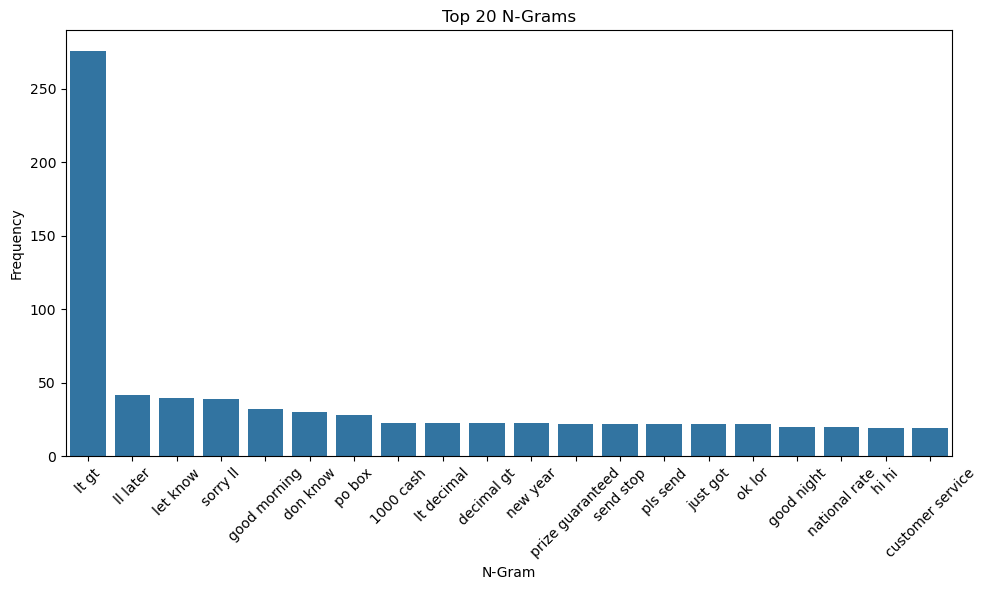

In [3]:
# Top N-Grams Analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = cv.fit_transform(df['sms'])
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:20]
top_ngrams = [word[0] for word in words_freq]
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in words_freq], y=[word[1] for word in words_freq])
plt.title('Top 20 N-Grams')
plt.xlabel('N-Gram')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

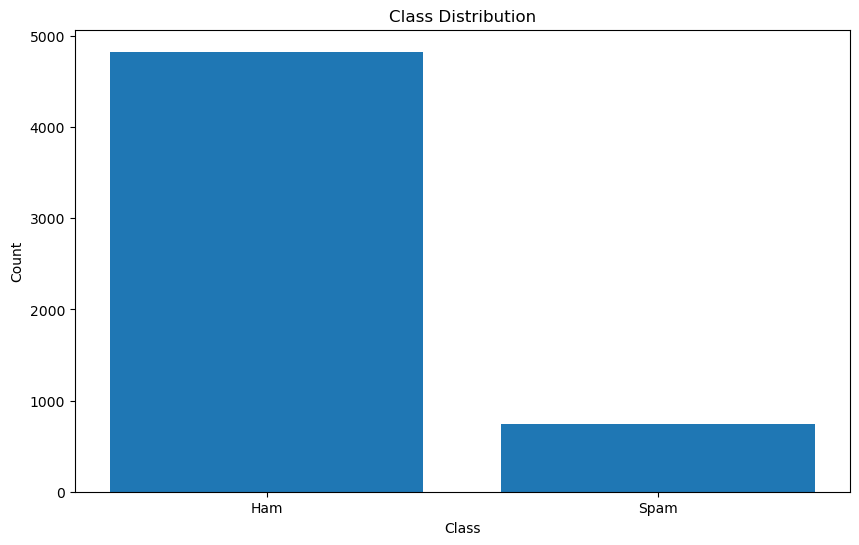

In [4]:
# Plot class distribution
import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(8, 6))
# sns.countplot(data=df, x='label')
class_counts = df['label'].value_counts()
fig , ax = plt.subplots(figsize=(10,6))
ax.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count') 
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

## CLEANING TEXT

In [17]:
!pip install nltk


  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ -------------------------------

In [5]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Manit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

def clean_text(text):
    #Convert to lowercase 
    text = text.lower()
    #remove special char and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #remove links 
    text = re.sub(r'https\S+' , '',text)
    #tokenize the text
    words = word_tokenize(text)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    #intialize porter stemmer
    stemer = PorterStemmer()
    stemmed_words = [stemer.stem(word) for word in filtered_words]
    #join the stemmed words together 
    cleaned_text = ' '.join(stemmed_words)

    return cleaned_text


df['clean_text'] = df['sms'].apply(lambda x : clean_text(x))    


In [7]:
df.head()

,sms,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goe usf live around though


## BALANCING THE DATASET

In [16]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop('label' , axis = 1)
y = df['label']

oversampler = RandomOverSampler()
X_resampled , y_resampled = oversampler.fit_resample(X , y)

df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['label'] = y_resampled

## TRAIN TEST SPLIT AND VECTORIZATION

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['clean_text'], df_balanced['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## MODEL BUILDING

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [25]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[990   4]
 [  0 937]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



In [26]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for logistic regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression - Confusion Matrix:")
print(conf_matrix_lr)
print("\nLogistic Regression - Classification Report:")
print(class_report_lr)

Logistic Regression - Confusion Matrix:
[[985   9]
 [ 15 922]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       994
           1       0.99      0.98      0.99       937

    accuracy                           0.99      1931
   macro avg       0.99      0.99      0.99      1931
weighted avg       0.99      0.99      0.99      1931



In [27]:
from sklearn.svm import SVC

# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Confusion matrix and classification report for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print("SVM - Confusion Matrix:")
print(conf_matrix_svm)
print("\nSVM - Classification Report:")
print(class_report_svm)

SVM - Confusion Matrix:
[[991   3]
 [  3 934]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



#### ENSEMBLING

In [30]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ("random_forest" , rf_classifier),
    ("logistic_regression" , lr_classifier),
    ("svm" , svm_classifier)
    
],voting = 'hard')

ensemble_classifier.fit(X_train_tfidf , y_train)
y_pred_ensemble = ensemble_classifier.predict(X_test_tfidf)


conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
class_report_ensemble = classification_report(y_test, y_pred_ensemble)

print("SVM - Confusion Matrix:")
print(conf_matrix_ensemble)
print("\nSVM - Classification Report:")
print(class_report_ensemble)

SVM - Confusion Matrix:
[[991   3]
 [  3 934]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       994
           1       1.00      1.00      1.00       937

    accuracy                           1.00      1931
   macro avg       1.00      1.00      1.00      1931
weighted avg       1.00      1.00      1.00      1931



## SAVING AND LOADING THE MODEL

In [32]:
import pickle
pickle.dump(rf_classifier , open("model.pkl" , "wb"))
pickle.dump(tfidf_vectorizer , open("tfidf.pkl" , "wb"))

with open("model.pkl" , "rb") as file:
    rf_classifer = pickle.load(file)

with open("tfidf.pkl" , "rb") as file:
    tfidf_vectorizer = pickle.load(file)

### DETECTION SYSTEM

In [38]:
def predict_real_or_not(text):
    cleaned_text = clean_text(text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])

    prediction = rf_classifier.predict(vectorized_text)
    return prediction[0]



In [52]:
input_text = "Your account is eligible for a free mobile recharge of ₹200. Visit: recharge-free.com"
result = predict_real_or_not(input_text)

if result == 0:
    print("MESSAGE IS REAL")
else:
    print("MESSAGE IS FAKE")

MESSAGE IS FAKE
